<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [33]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [6]:
# Read CSV
#house_csv = "../DATA/Sacramento_transactions.csv"

house_csv = "Sacramento_transactions.csv"
data = pd.read_csv(house_csv)
data.head()
data['baths']

0      1
1      1
2      1
3      1
4      1
      ..
980    3
981    2
982    2
983    2
984    2
Name: baths, Length: 985, dtype: int64

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [ ]:
# ANSWER, it is price as it is the output that we are looking at 

#### 2.2 List all possible variables which might be Predictor variable.

In [ ]:
# ANSWER, beds, baths, sq_fit and type 


#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [5]:
# ANSWER, bath as it is cloest value to 1
data.corr()



,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [ ]:
# ANSWER using linear regression

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [ ]:
# ANSWER

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [ ]:
# ANSWER

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [54]:
# ANSWER

def mean(values):
	return sum(values) / float(len(values))
 
# Calculate the variance of a list of numbers
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])
 
# calculate mean and variance

x = data['baths']
y = data['price']
mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x, mean_x), variance(y, mean_y)
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))


# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

mean_x, mean_y = mean(x), mean(y)
covar = covariance(x, mean_x, y, mean_y)
print('Covariance: %.3f' % (covar))

b1 = covar / var_x
print(b1)

x stats: mean=1.777 variance=788.863
Covariance: 50738509.071
64318.53523673409


##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [55]:
# ANSWER

b0= mean(y)-(covar / var_x)*mean(x)
print (b0)

119872.75465554858


##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

0      184191.289892
1      184191.289892
2      184191.289892
3      184191.289892
4      184191.289892
           ...      
980    312828.360366
981    248509.825129
982    248509.825129
983    248509.825129
984    248509.825129
Name: baths, Length: 985, dtype: float64


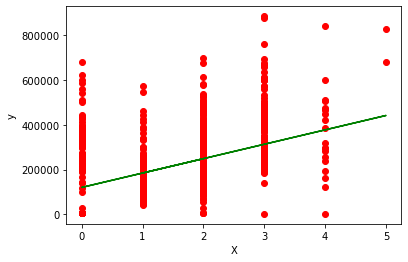

In [56]:
y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('X')
plt.ylabel('y')

print(y_pred)

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [57]:
# ANSWER
residual = y - y_pred
print (residual)

0     -124969.289892
1     -115979.289892
2     -115311.289892
3     -114884.289892
4     -102291.289892
           ...      
980    -80403.360366
981    -14509.825129
982    -13509.825129
983    -13208.825129
984    -12771.825129
Length: 985, dtype: float64


##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [58]:
# ANSWER

error = y - y_pred
se = np.sum(error**2)
print('squared error is', se)
    
SSt = np.sum((y - mean(y))**2)
R2 = 1- (se/SSt)
print('R square is', R2)

squared error is 15575357155318.627
R square is 0.17322915474708322


##### 2.7.F [BONUS] Draw Plot of Predicted Line

0      184191.289892
1      184191.289892
2      184191.289892
3      184191.289892
4      184191.289892
           ...      
980    312828.360366
981    248509.825129
982    248509.825129
983    248509.825129
984    248509.825129
Name: baths, Length: 985, dtype: float64


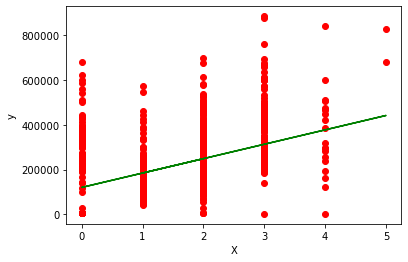

In [59]:
# ANSWER
y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('X')
plt.ylabel('y')

print(y_pred)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

0      184191.289892
1      184191.289892
2      184191.289892
3      184191.289892
4      184191.289892
           ...      
980    312828.360366
981    248509.825129
982    248509.825129
983    248509.825129
984    248509.825129
Name: baths, Length: 985, dtype: float64


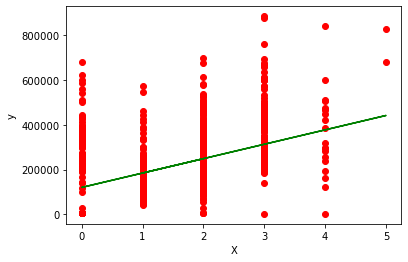

In [60]:
# ANSWER
y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('X')
plt.ylabel('y')

print(y_pred)

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [61]:
# ANSWER

predicted = b1 * (1204)+ b0
print(predicted)

77559389.1796834




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



